# Long term deposit Prediction Project
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

### About
This dataset, titled Direct Marketing Campaigns for Bank Term Deposits, is a collection of data related to the direct marketing campaigns conducted by a Portuguese banking institution. These campaigns primarily involved phone calls with customers, and the objective was to determine whether or not a customer would subscribe to a term deposit offered by the bank.

The dataset contains various features that provide insights into customer attributes and campaign outcome




1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



## 1) Problem statement.

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call. You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

**In this project we are going to use the data given to build a Classification model:**

* This model is to check if term deposit subscribed or not based on the given dataset.


## 2) Data Collection.
* The Dataset is part financial institute


https://www.kaggle.com/datasets/

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline



**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv(r"J:\Long-term-deposit-prediction\data\bank-additional-full.csv")

**Show Top 5 Records**

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Shape of the dataset**

In [4]:
df.shape

(41188, 21)

**Summary of the dataset**

In [5]:
# Display summary statistics for a dataframe
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Check Datatypes in the dataset**

In [6]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 3. EXPLORING DATA

In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

We have 11 categorical features : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'deposit']


In [9]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: proportion, dtype: float64
---------------------------
marital
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: proportion, dtype: float64
---------------------------
education
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: proportion, dtype: float64
---------------------------
default
no         79.120132
unknown    20.872584
yes         0.007284
Name: proportion, dtype: float64
---------------

**Insights**
 - We got the unknown category in each feature and all the opertaion is operated in weekdays

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Features

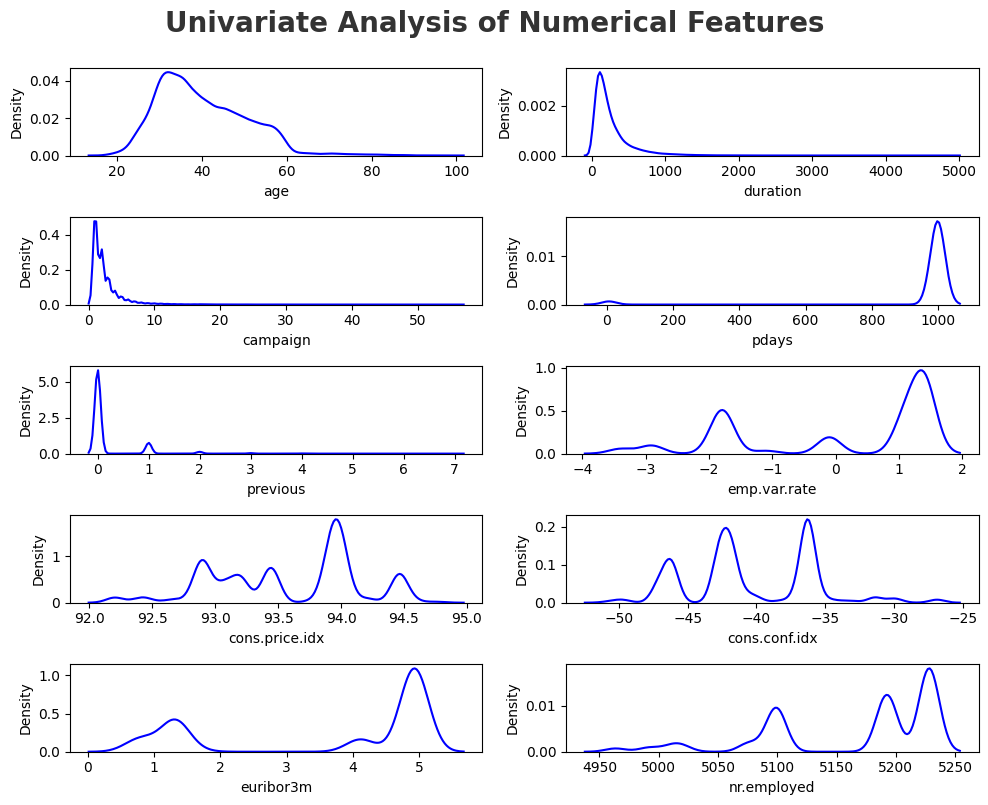

In [10]:
import math

n_features = len(numeric_features)
n_cols = 2  # For example, 2 columns
n_rows = math.ceil(n_features / n_cols)  # Dynamically calculate the number of rows

plt.figure(figsize=(10, 8))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(n_features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])

plt.tight_layout()
plt.show()


    
# save plot
# plt.savefig('./images/Univariate_Num.png')

**Insights**
*  The most of the columns like skewed dataset due to the outliers. so we have to apply power log transformer.



### Categorical Features

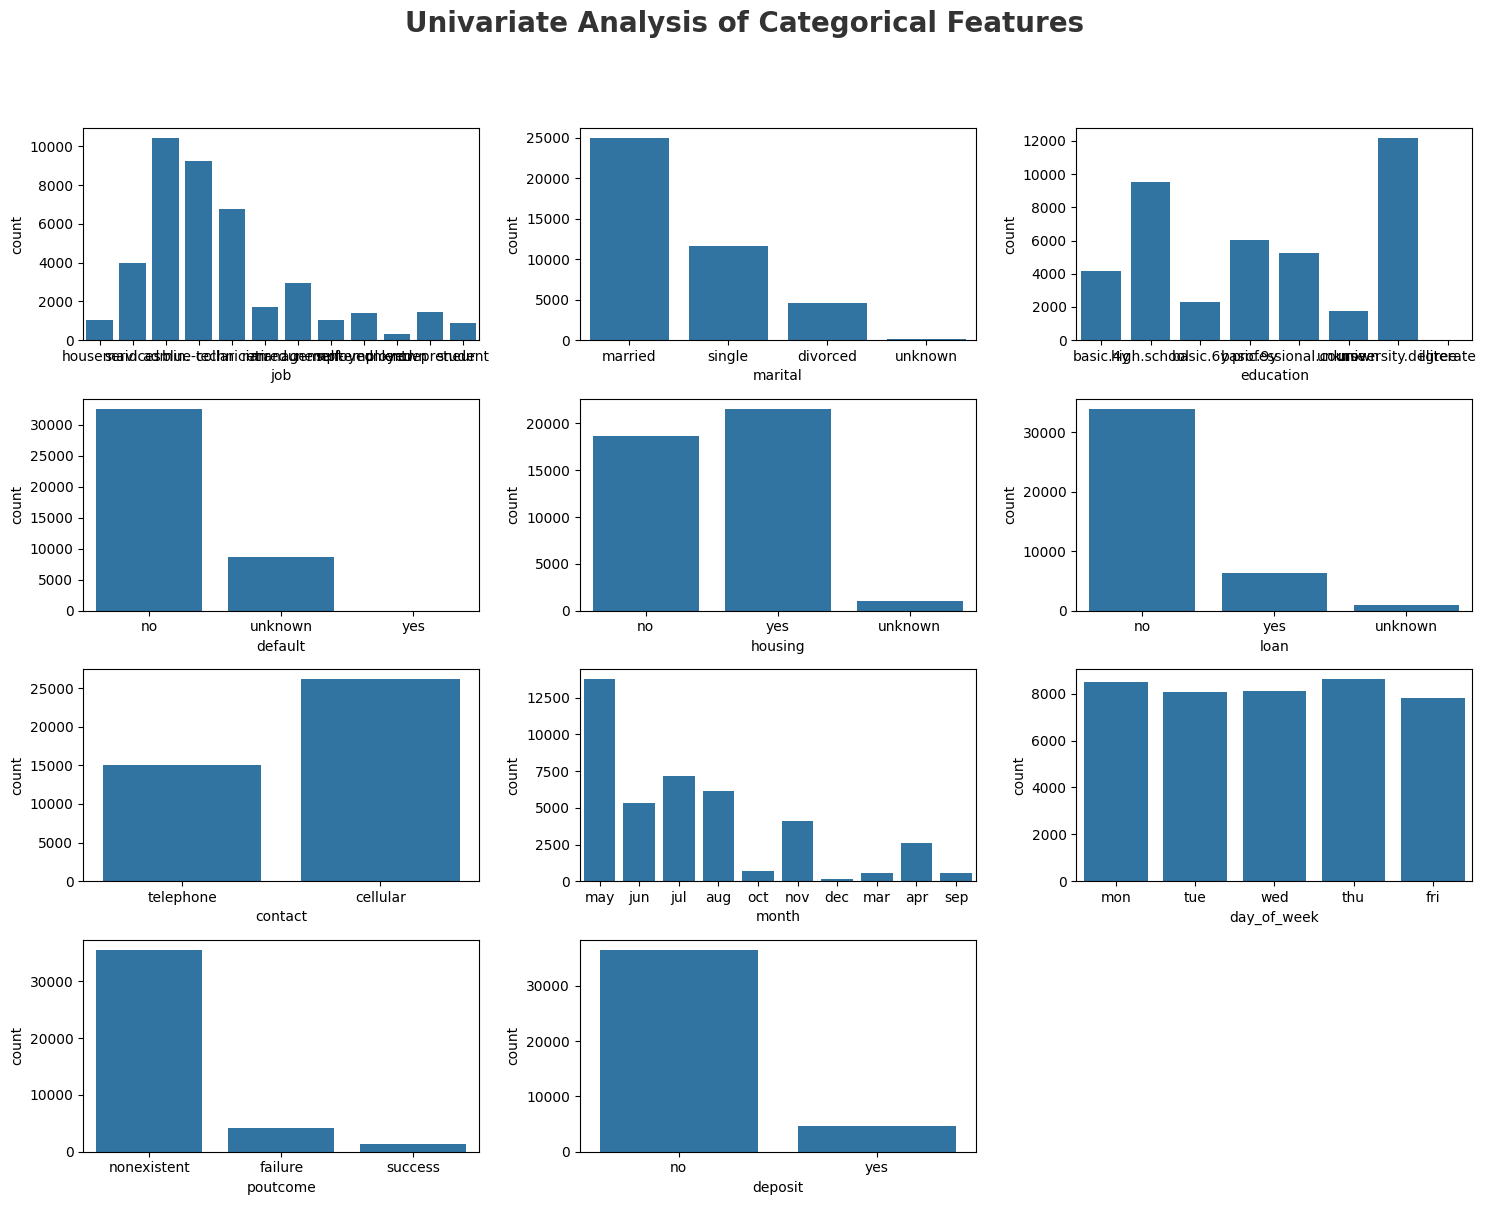

In [11]:
# categorical columns

import math

n_features = len(categorical_features)
n_cols = 3  # Set the number of columns
n_rows = math.ceil(n_features / n_cols)  # Dynamically calculate the number of rows

plt.figure(figsize=(15, n_rows *3 ))  # Adjust figure size based on rows
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, n_features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

**Insights**
Job:
The most dominant categories are "blue-collar," "management," and "technician." These represent the largest groups in the dataset.

Marital Status:
"Married" dominates this category, with significantly more individuals in this group than "single" or "divorced."
Education:

"University degree" and "high school" are the dominant categories. "Basic education" also has a noticeable presence, but other categories have fewer instances.
Default on Credit:

The "no" category dominates, meaning most individuals do not have a default on their credit.
Housing Loan:

The majority of individuals do not have a housing loan, making "no" the dominant category.
Personal Loan (Loan):

Similar to housing loans, most individuals do not have a personal loan, so "no" dominates here as well.
Contact:

"Cellular" is the dominant contact method, with almost double the instances of "telephone."
Month of Contact:

The months May, July, August, and October dominate in terms of the number of contacts.
Day of the Week:

The distribution is relatively even, but Tuesday, Wednesday, and Thursday have slightly higher contact numbers.
Previous Outcome of Campaign (poutcome):

"Nonexistent" dominates, meaning most individuals were not part of any prior campaign.
Subscription (y):
"No" dominates this column, as most individuals did not subscribe to the term deposit.

In [12]:
#unique values in columns
for i in df.columns:
    print(i)
    print(df[i].unique)
    print('------------------------------------------------------------------------')

age
<bound method Series.unique of 0        56
1        57
2        37
3        40
4        56
         ..
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, Length: 41188, dtype: int64>
------------------------------------------------------------------------
job
<bound method Series.unique of 0          housemaid
1           services
2           services
3             admin.
4           services
            ...     
41183        retired
41184    blue-collar
41185        retired
41186     technician
41187        retired
Name: job, Length: 41188, dtype: object>
------------------------------------------------------------------------
marital
<bound method Series.unique of 0        married
1        married
2        married
3        married
4        married
          ...   
41183    married
41184    married
41185    married
41186    married
41187    married
Name: marital, Length: 41188, dtype: object>
---------------------------------------------------------------------

In [13]:
lst=["job", "marital","education","default","housing","loan"]
for i in lst:
    mode=df[i].mode()[0]
    df[i]=df[i].replace('unknown', mode)

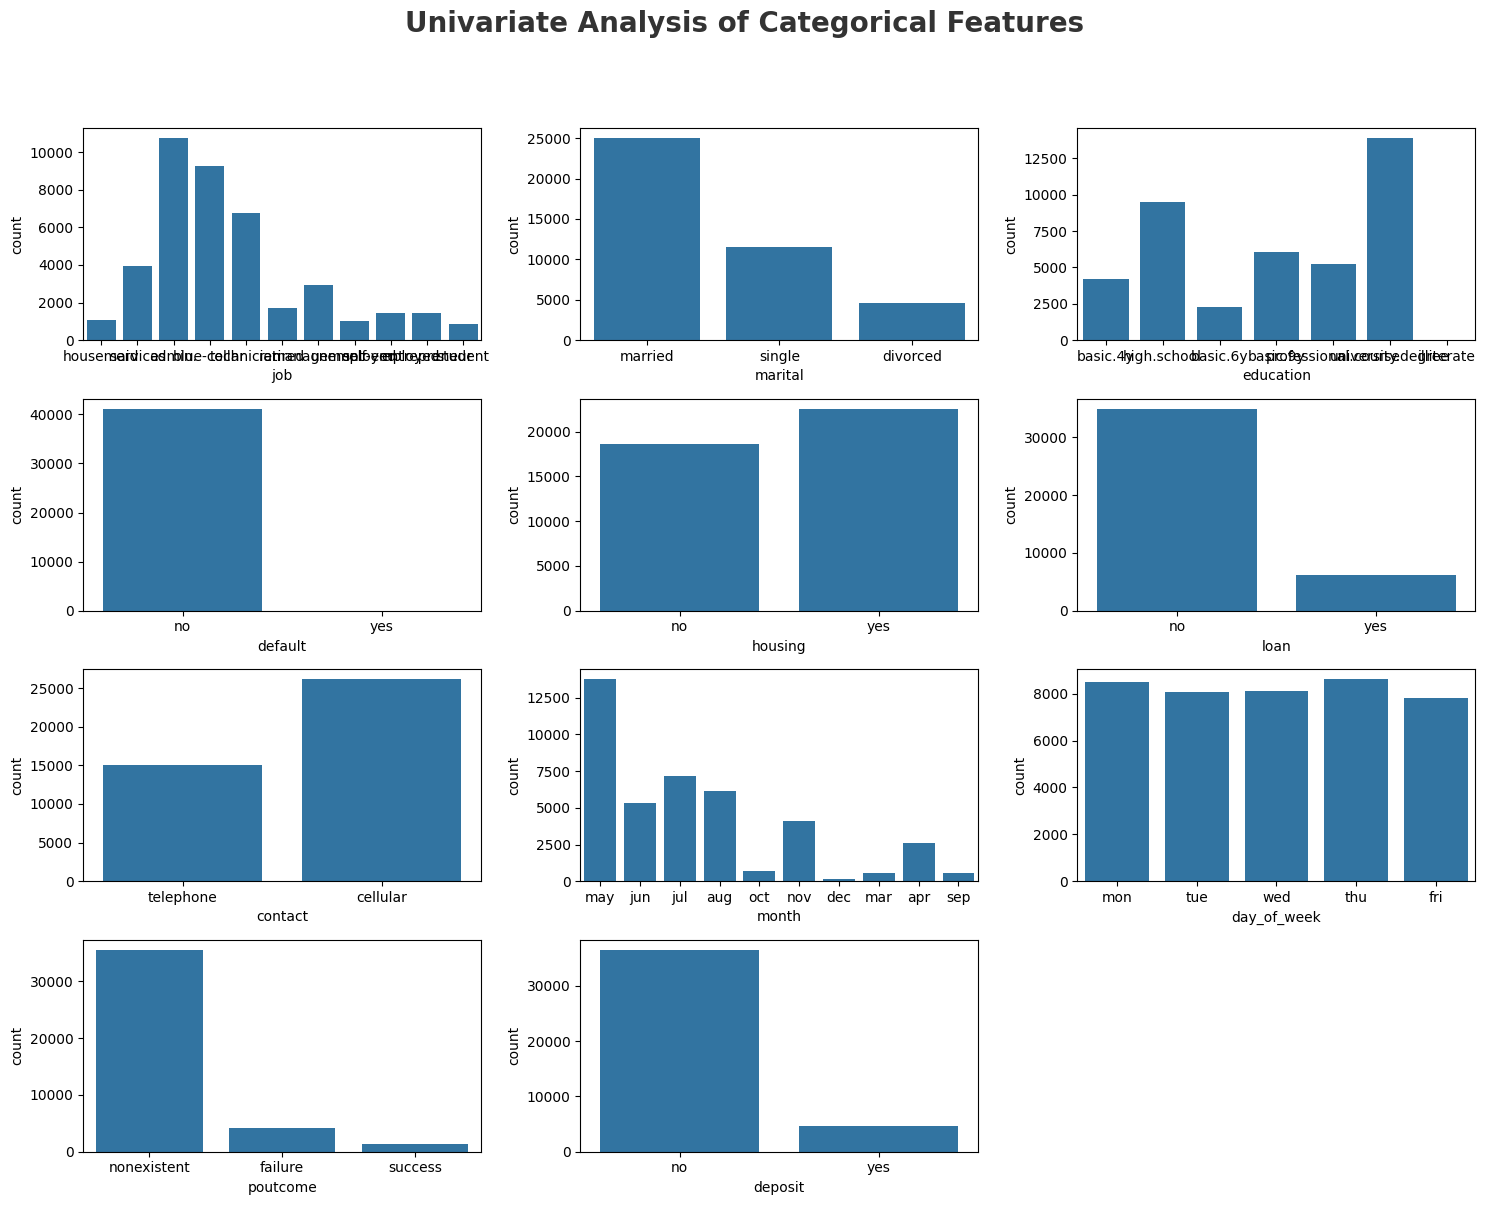

In [14]:
# categorical columns

import math

n_features = len(categorical_features)
n_cols = 3  # Set the number of columns
n_rows = math.ceil(n_features / n_cols)  # Dynamically calculate the number of rows

plt.figure(figsize=(15, n_rows *3 ))  # Adjust figure size based on rows
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, n_features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

### Multivariate Analysis

In [15]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


* Multivariate analysis is the analysis of more than one variable.

In [16]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 3 discrete features : ['previous', 'emp.var.rate', 'nr.employed']

We have 7 continuous_features : ['age', 'duration', 'campaign', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


### Check Multicollinearity in Numerical features

In [17]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # We are interested in absolute correlation value
                colname = corr_matrix.columns[i]  # Get the name of the column
                col_corr.add(colname)

    return col_corr

In [18]:
cor=correlation(df[numeric_features],0.7)
print(cor)

{'euribor3m', 'nr.employed', 'cons.price.idx'}


**Insights**
 - The 'cons.price.idx', 'emp.var.rate', 'euribor3m', 'nr.employed', 'previous' have higher co-rrelation than threshold value so we can deop it.

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e y**

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [19]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['deposit'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,job,Reject Null Hypothesis
1,marital,Reject Null Hypothesis
2,education,Reject Null Hypothesis
3,default,Fail to Reject Null Hypothesis
4,housing,Reject Null Hypothesis
5,loan,Fail to Reject Null Hypothesis
6,contact,Reject Null Hypothesis
7,month,Reject Null Hypothesis
8,day_of_week,Reject Null Hypothesis
9,poutcome,Reject Null Hypothesis


**Report** 
* Here Housing and loan fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

### Checking Null Values

In [20]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [22]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


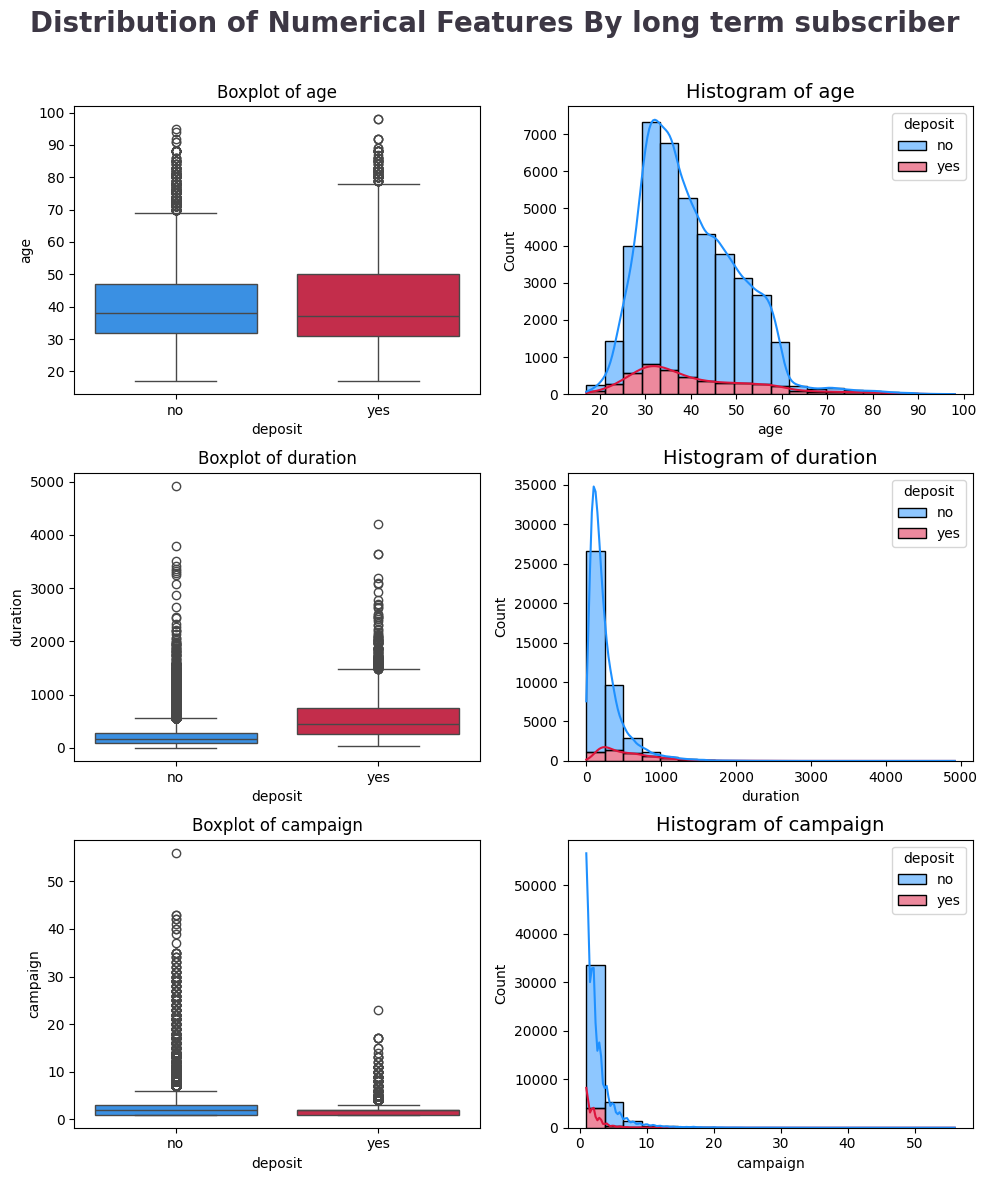

In [23]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10, 12))

# Figure title
fig.suptitle('Distribution of Numerical Features By long term subscriber', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

# Loop through the features
for i, col in enumerate(continues_features[:3]):  # Ensure no more than 3 features
    # Boxplot for each feature
    sns.boxplot(data=df, x='deposit', y=col, palette=clr1, ax=ax[i, 0])  # Ensure 'y' is the correct column name
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)

    # Histogram for each feature
    sns.histplot(data=df, x=col, hue='deposit', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i, 1])  # Ensure 'y' is the correct column name
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=14)

# Adjust layout
fig.tight_layout()
fig.subplots_adjust(top=0.90)

# Save the figure if needed
# plt.savefig('images/multivariate_num.png')

plt.show()


## Initial Analysis Report

* **boxplot of age, duration and campaingn has many outliers which can be Handled in Feature Engineering and `duration and campaingn` is Right Skewed.**


## 4. Visualization

### 4.1 Visualize the Target Feature

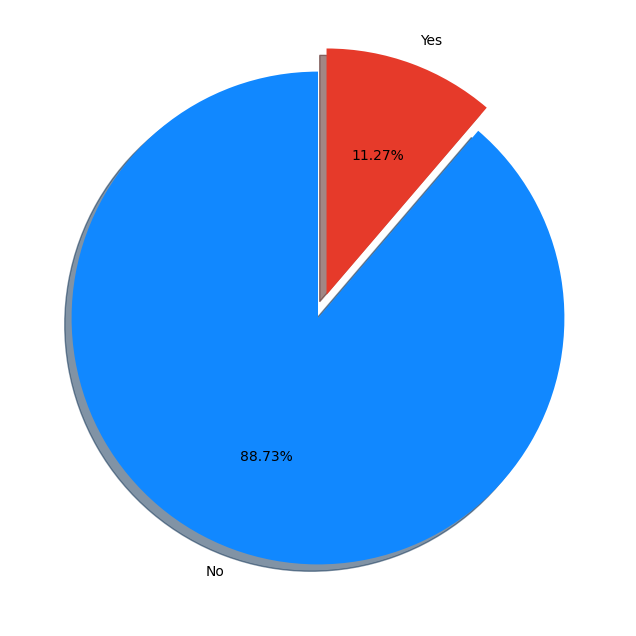

In [24]:
percentage = df.deposit.value_counts(normalize=True)*100
labels = ["No","Yes"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

* From the chart it is seen that the Target Variable is Imbalanced
**What is imbalanced data?**

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here 0 value has more count than the 1 value of the dataset.

In [25]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 4.2 Does customer job has any impact on long term deposit ?

In [26]:
#group data by job and their count of deposit
df.groupby('job')['deposit'].value_counts(normalize=True).to_frame()*100

proportion
job           deposit            
admin.        no        87.081473
              yes       12.918527
blue-collar   no        93.105684
              yes        6.894316
entrepreneur  no        91.483516
              yes        8.516484
housemaid     no        90.000000
              yes       10.000000
management    no        88.782490
              yes       11.217510
retired       no        74.767442
              yes       25.232558
self-employed no        89.514426
              yes       10.485574
services      no        91.861930
              yes        8.138070
student       no        68.571429
              yes       31.428571
technician    no        89.173958
              yes       10.826042
unemployed    no        85.798817
              yes       14.201183

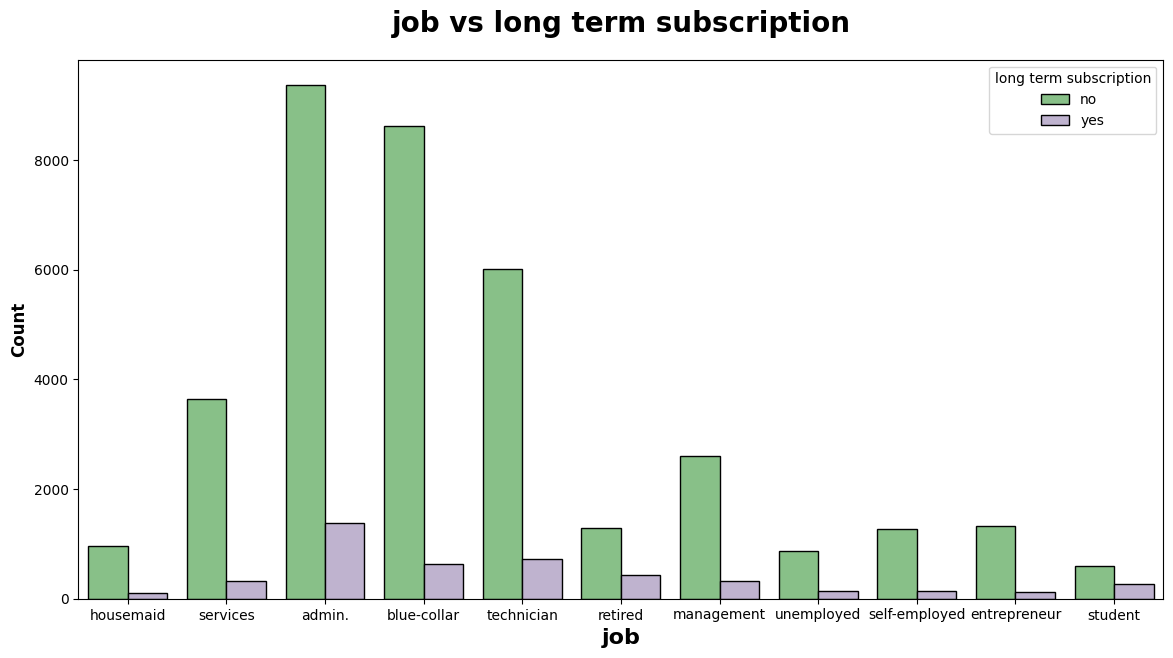

In [27]:
plt.subplots(figsize=(14,7))
sns.countplot(x="job",hue="deposit", data=df, ec = "black",palette="Accent")
plt.title("job vs long term subscription", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("job", weight="bold", fontsize=16)
plt.legend(title="long term subscription", fancybox=True)
plt.show()

In [28]:
df2 = df.copy()

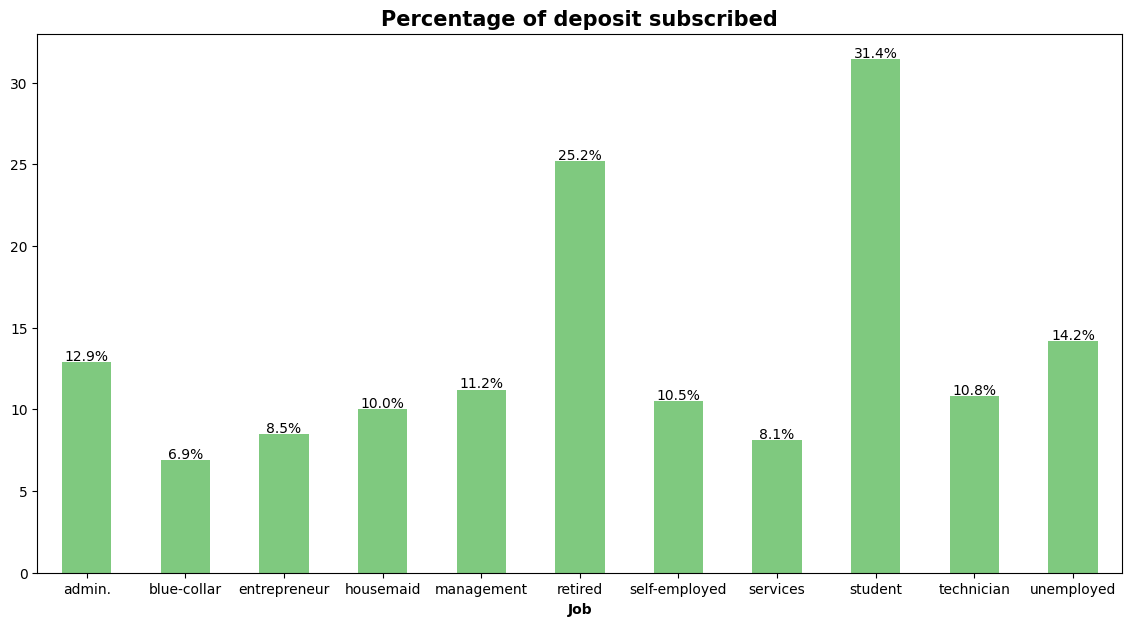

In [29]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['yes'])]['job'].value_counts()/df2['job'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of deposit subscribed" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['yes'])]['job'].value_counts()/df2['job'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Job' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()


##Report



The percentage of Job having the retired, student, mangement has highest long term deposit subscription.

### 4.3 Does customer marital status has any impact on Long Term subscription ?

In [30]:
#group data by Education and their count of case_status
df.groupby('marital')['deposit'].value_counts(normalize=True).to_frame()*100

proportion
marital  deposit            
divorced no        89.679098
         yes       10.320902
married  no        89.827255
         yes       10.172745
single   no        85.995851
         yes       14.004149

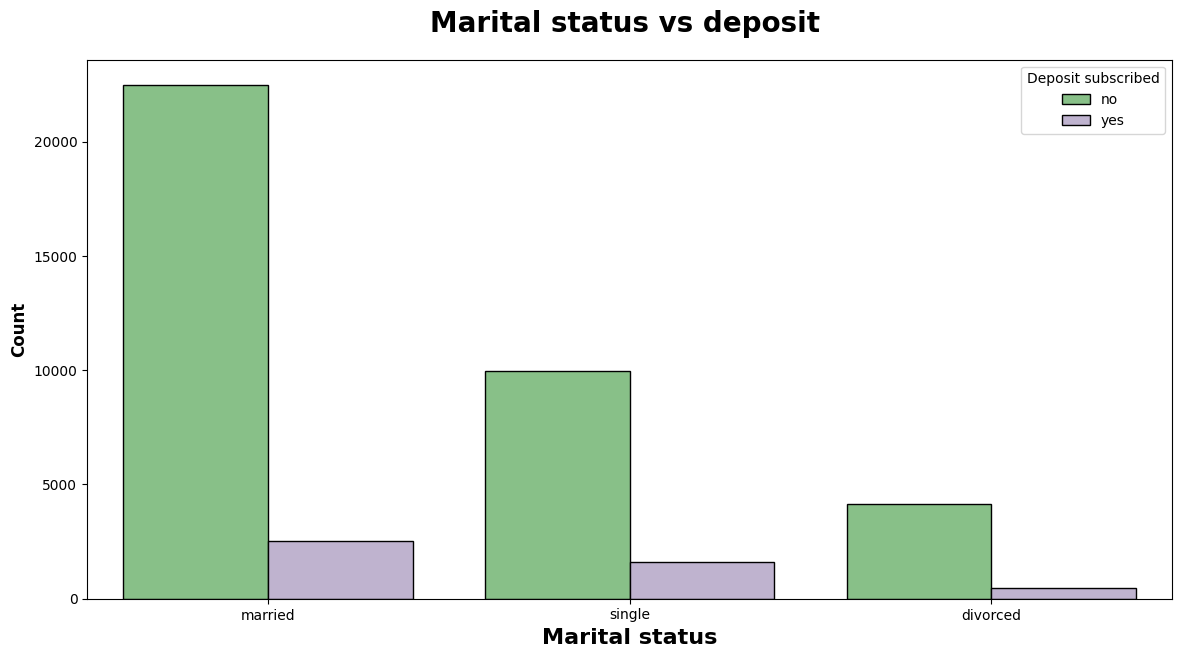

In [31]:
plt.subplots(figsize=(14,7))
sns.countplot(x="marital",hue="deposit", data=df, ec = "black",palette="Accent")
plt.title("Marital status vs deposit ", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Marital status", weight="bold", fontsize=16)
plt.legend(title="Deposit subscribed", fancybox=True)
plt.show()

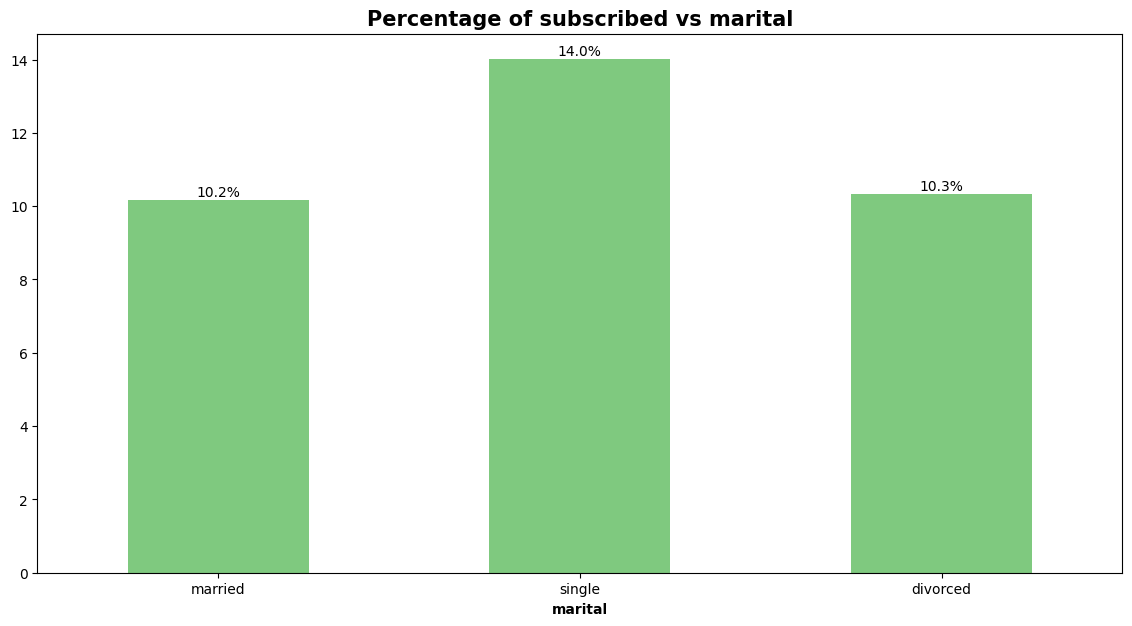

In [32]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['yes'])]['marital'].value_counts()/df2['marital'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of subscribed vs marital" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['yes'])]['marital'].value_counts()/df2['marital'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('marital' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Insights**
- Deposit having marital status married, single, divirced has balancing distribution. so we can drop the marital status column

### 4.4 Does customer having education has any impact on deposit ?

In [33]:
#group data by has_job_experience and count case_status
df.groupby('education')['deposit'].value_counts(normalize=True).to_frame()*100

proportion
education           deposit            
basic.4y            no        89.750958
                    yes       10.249042
basic.6y            no        91.797557
                    yes        8.202443
basic.9y            no        92.175352
                    yes        7.824648
high.school         no        89.164477
                    yes       10.835523
illiterate          no        77.777778
                    yes       22.222222
professional.course no        88.651535
                    yes       11.348465
university.degree   no        86.178862
                    yes       13.821138

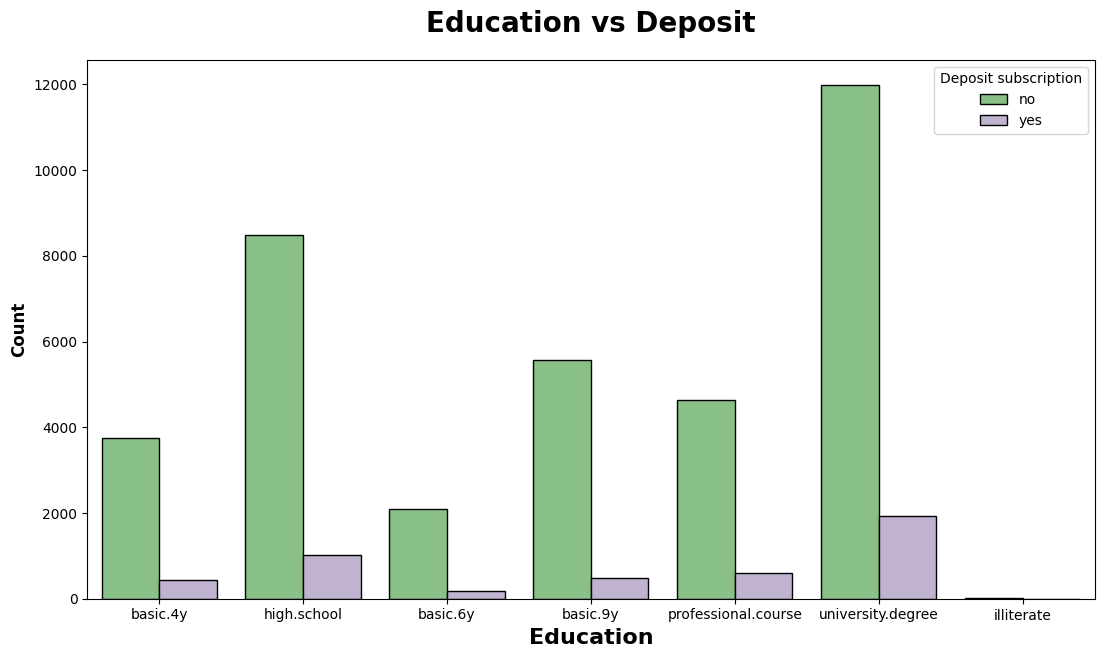

In [34]:
plt.subplots(figsize=(13,7))
sns.countplot(x="education",hue="deposit", data=df, ec= "black",palette="Accent")
plt.title("Education vs Deposit", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education", weight="bold", fontsize=16)
plt.legend(title="Deposit subscription", fancybox=True)
plt.show()

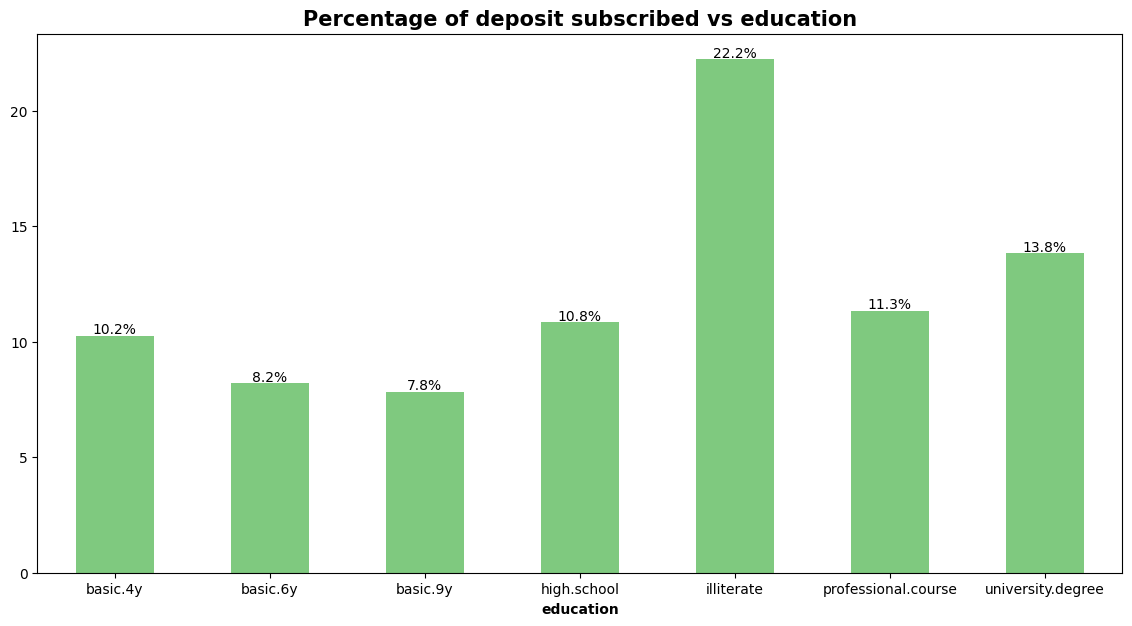

In [35]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['yes'])]['education'].value_counts()/df2['education'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of deposit subscribed vs education" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['yes'])]['education'].value_counts()/df2['education'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('education' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
* Customer with illiterate has been subcribed 22.5 % only.


### 4.5 if customer having default , does it make any impact on deposit?

In [36]:
#group data by requires_job_training and count case_status
df.groupby('default')['deposit'].value_counts(normalize=True).to_frame()*100

proportion
default deposit            
no      no        88.733762
        yes       11.266238
yes     no       100.000000

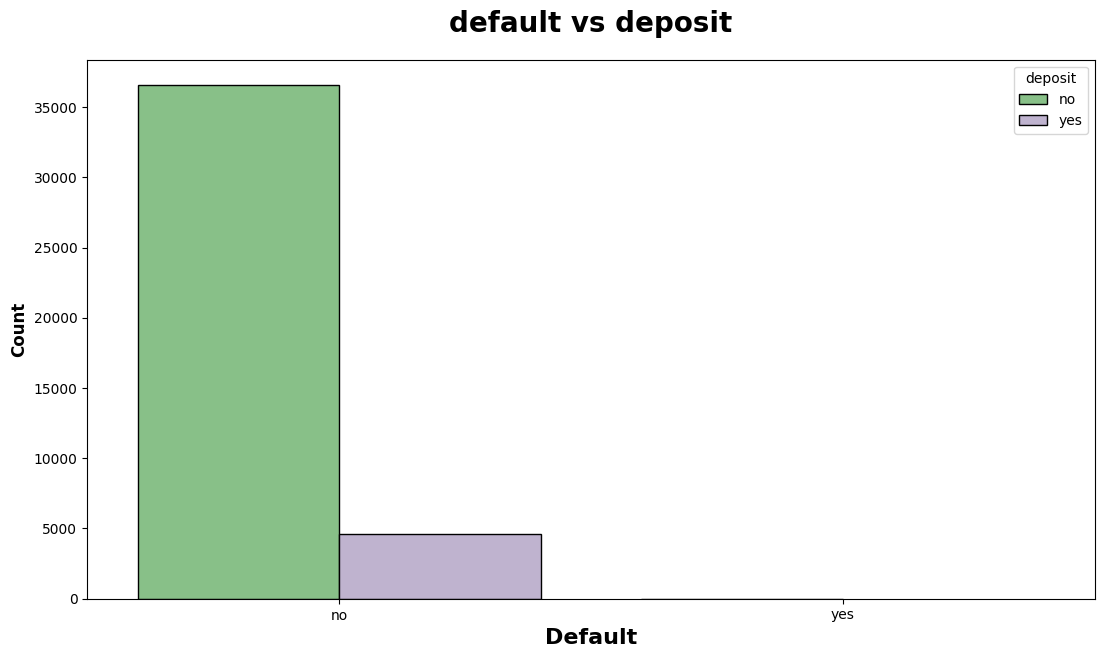

In [37]:
plt.subplots(figsize=(13,7))
sns.countplot(x="default",hue="deposit", data=df, ec= "black",palette="Accent")
plt.title("default vs deposit", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Default", weight="bold", fontsize=16)
plt.legend(title="deposit", fancybox=True)
plt.show()

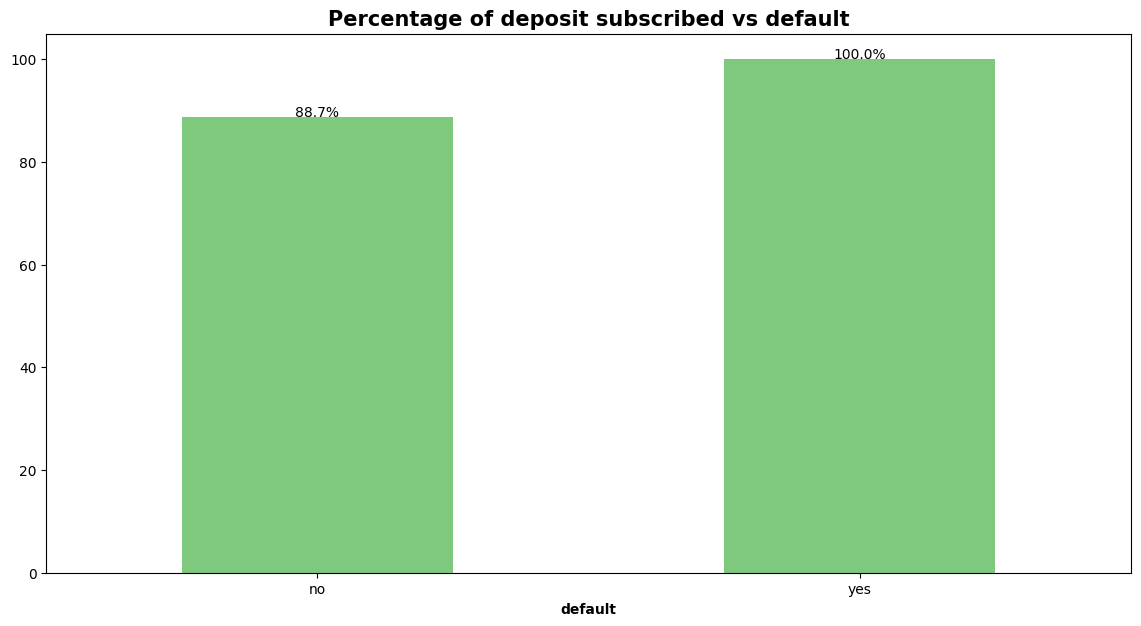

In [73]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['no'])]['default'].value_counts()/df2['default'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of deposit subscribed vs default" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['no'])]['default'].value_counts()/df2['default'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('default' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report**
The loan having similar distribution so we can drop it.

### 4.6 Does Housing of employer has any impact on long term subscription?

In [39]:
#group data by housing and count long term deposit subscription
df.groupby('housing')['deposit'].value_counts(normalize=True).to_frame()*100

proportion
housing deposit            
no      no        89.120395
        yes       10.879605
yes     no        88.416201
        yes       11.583799

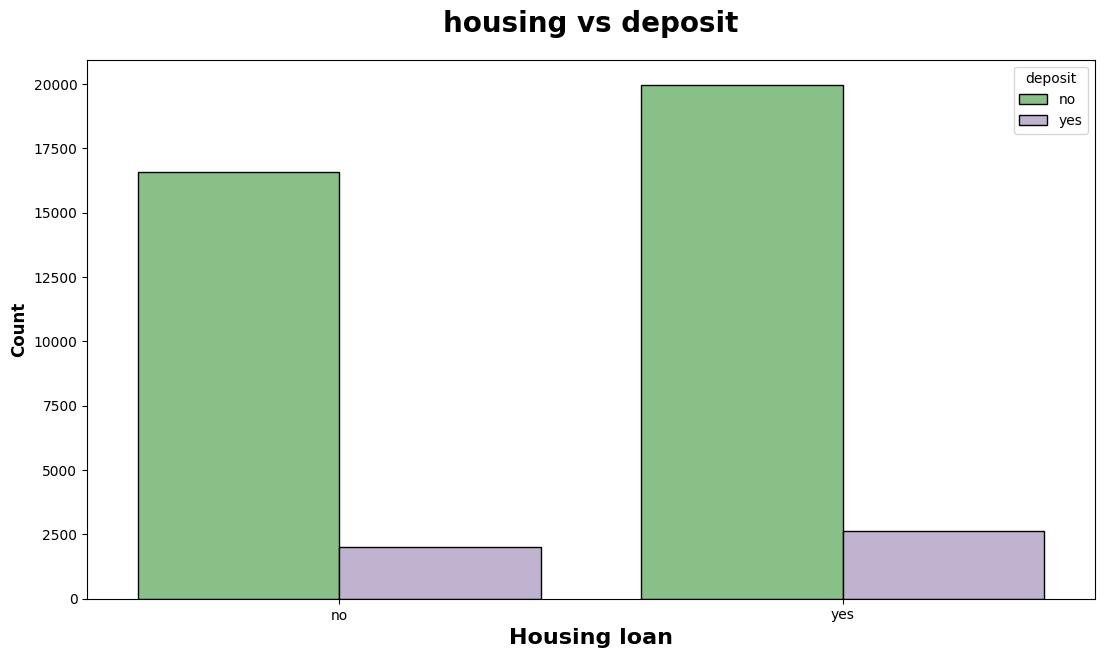

In [40]:
plt.subplots(figsize=(13,7))
sns.countplot(x="housing",hue="deposit", data=df, ec= "black",palette="Accent")
plt.title("housing vs deposit", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Housing loan", weight="bold", fontsize=16)
plt.legend(title="deposit", fancybox=True)
plt.show()

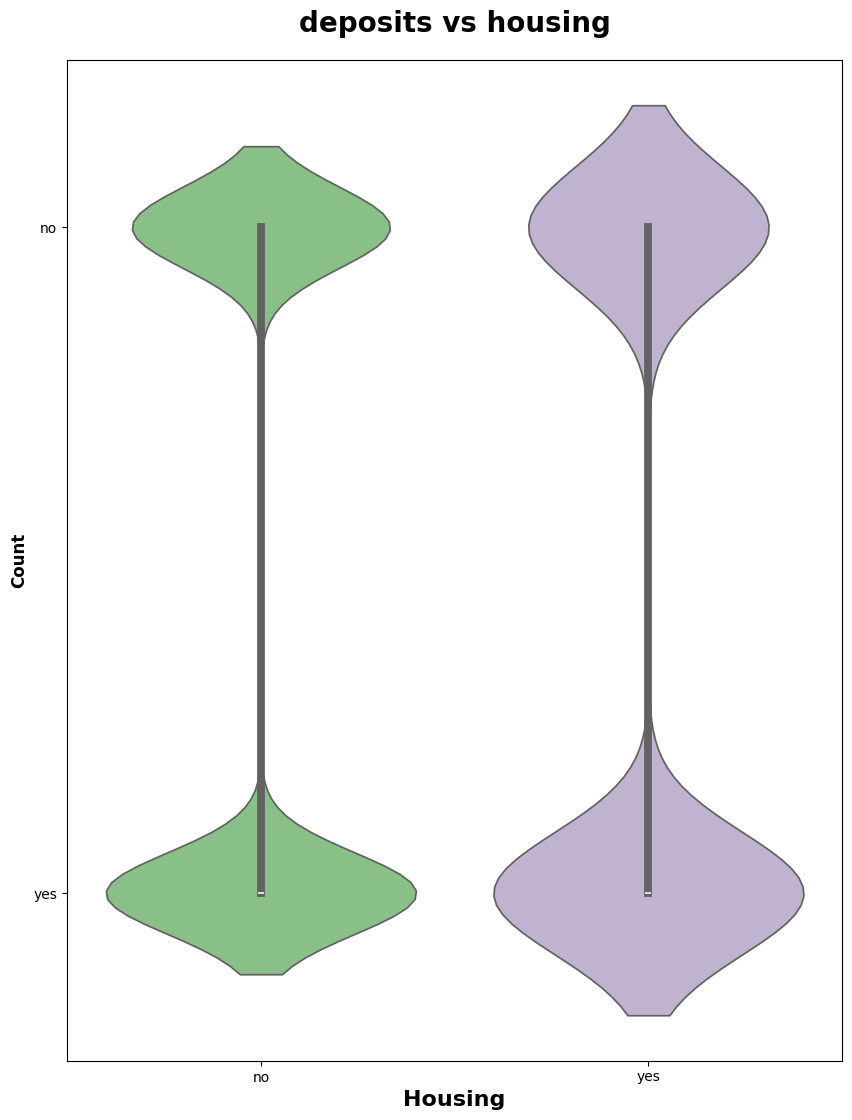

In [41]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="deposit",y='housing', data=df, palette="Accent")
plt.title("deposits vs housing", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Housing", weight="bold", fontsize=16)
plt.ylim()
plt.show()

**Insights**
 - The distrubution of both is similar. But there are outliers in both the classes which need to be handeled. so we can drop it
 

In [42]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 4.7 loan and its impact on deposit

In [43]:
#group data by loan and count the deposit
df.groupby('loan')['deposit'].value_counts(normalize=True)

loan  deposit
no    no         0.886749
      yes        0.113251
yes   no         0.890685
      yes        0.109315
Name: proportion, dtype: float64

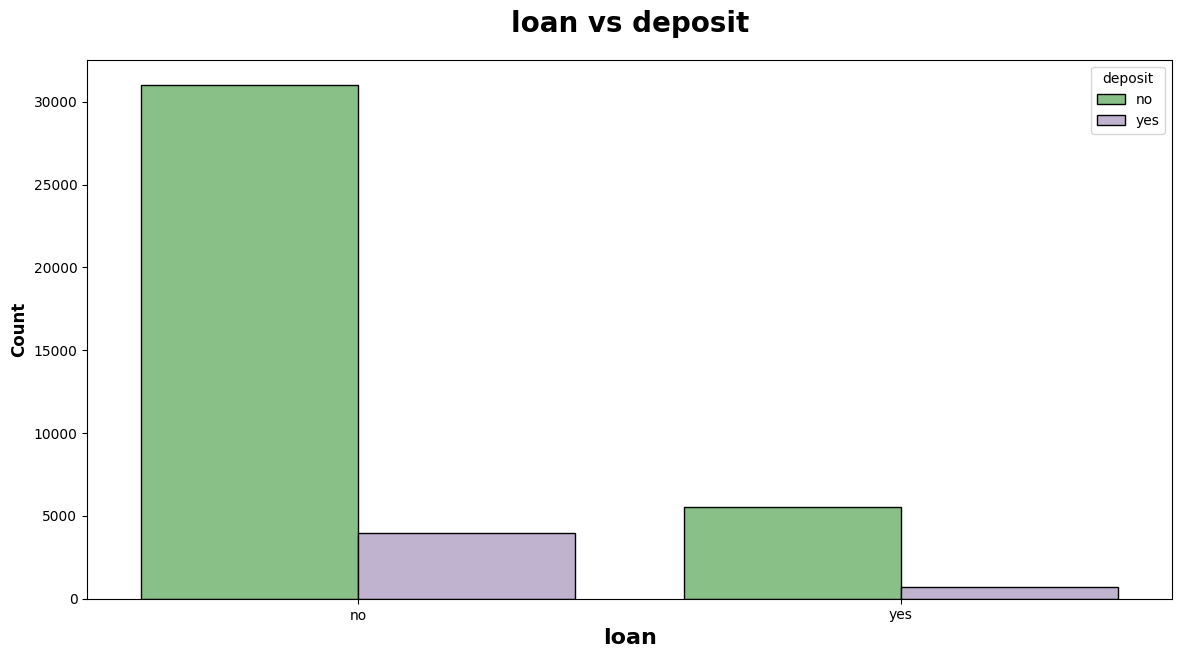

In [44]:
plt.subplots(figsize=(14,7))
sns.countplot(x="loan",hue="deposit", data=df,ec='k', palette='Accent')
plt.title("loan vs deposit", weight="bold",fontsize=20, pad=20)
plt.xlabel("loan", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

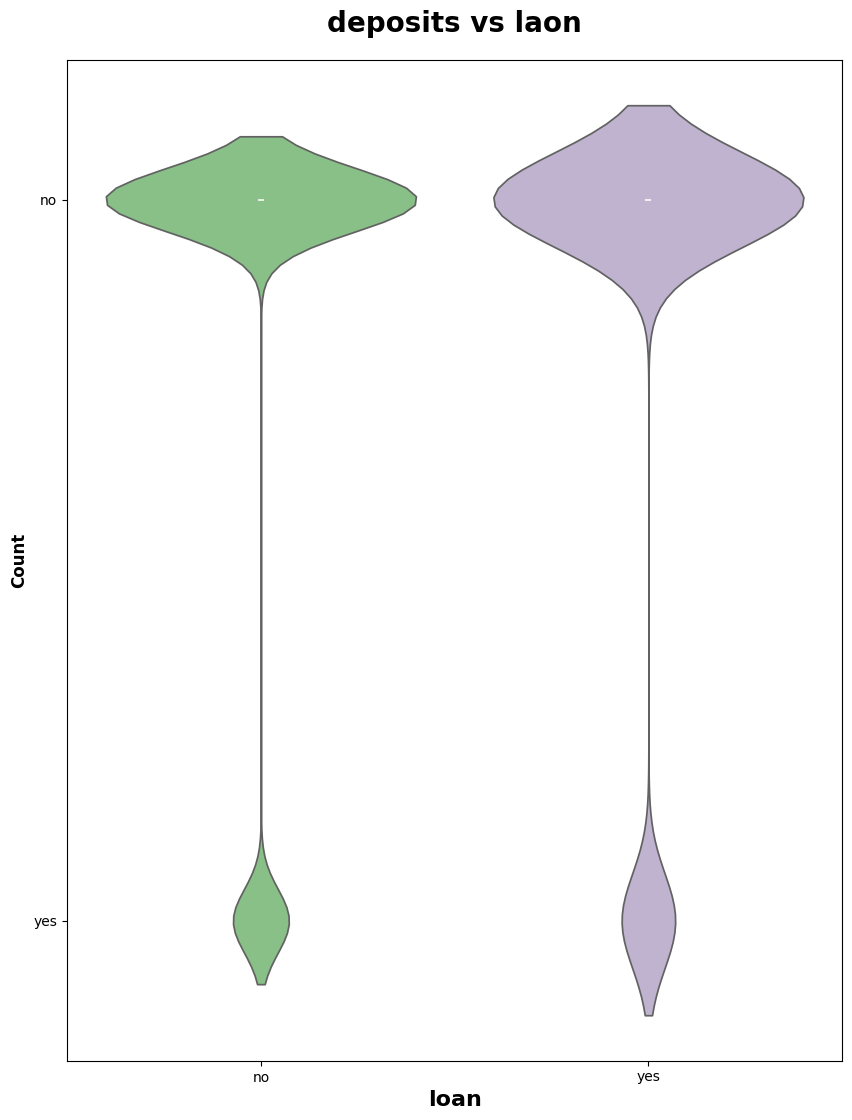

In [45]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="deposit",y='loan', data=df, palette="Accent")
plt.title("deposits vs laon", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("loan", weight="bold", fontsize=16)
plt.ylim()
plt.show()

**Report**

The loan has closer to the balancing distribution so we can drop it.

In [62]:
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 4.7 Contact and its impact on deposit

In [50]:
#group data by loan and count the deposit
df.groupby('contact')['deposit'].value_counts(normalize=True)

contact    deposit
cellular   no         0.852624
           yes        0.147376
telephone  no         0.947687
           yes        0.052313
Name: proportion, dtype: float64

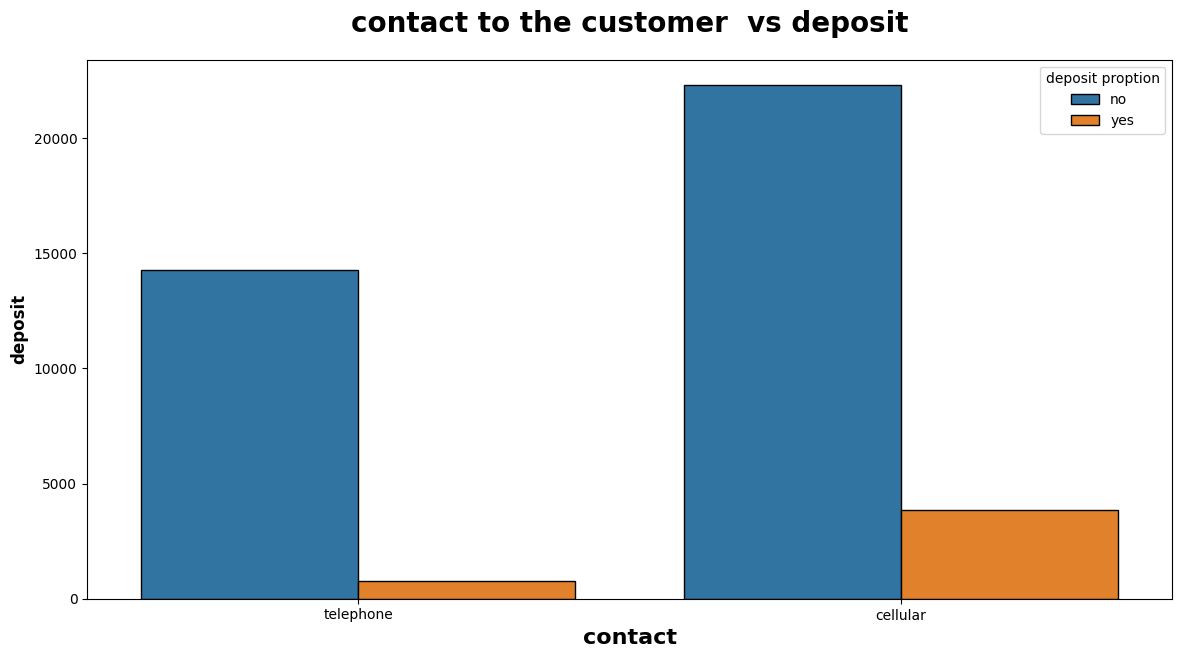

In [48]:
plt.subplots(figsize=(14,7))
sns.countplot(x="contact",hue="deposit", data=df,ec='k')
plt.title("contact to the customer  vs deposit", weight="bold",fontsize=20, pad=20)
plt.xlabel("contact", weight="bold", fontsize=16)
plt.ylabel("deposit", weight="bold", fontsize=12)
plt.legend(title="deposit proption", fancybox=True)
plt.show()

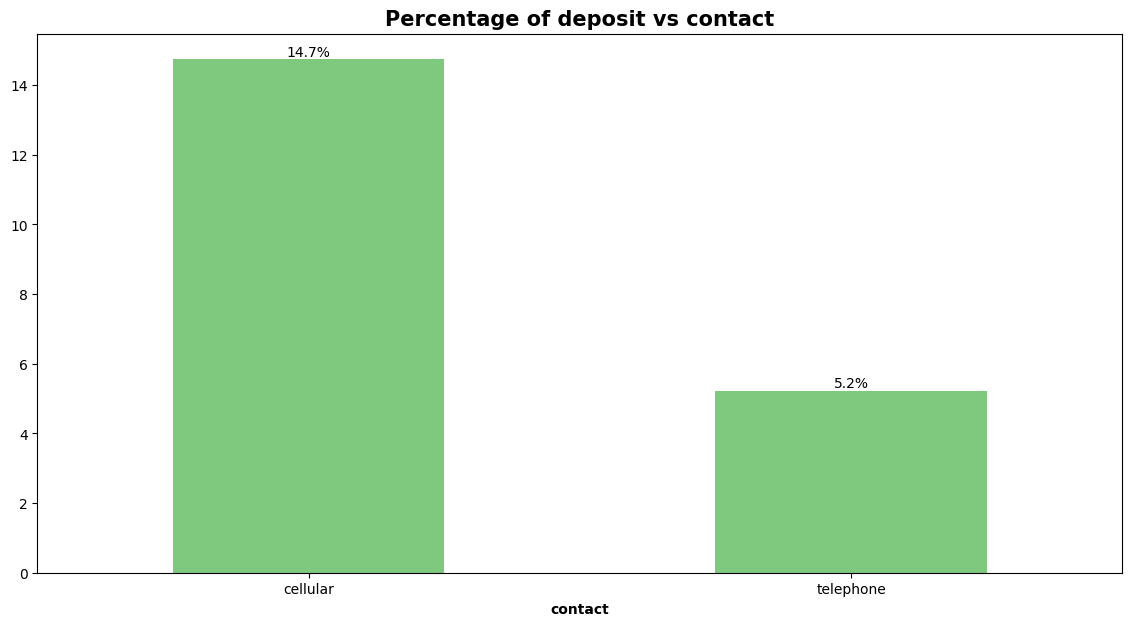

In [49]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['yes'])]['contact'].value_counts()/df2['contact'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of deposit vs contact" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['yes'])]['contact'].value_counts()/df2['contact'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('contact' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

### 4.8 Does month has any impact on deposit ?

In [53]:
#group data by month and count the deposit
df.groupby('month')['deposit'].value_counts(normalize=True)

month  deposit
apr    no         0.795213
       yes        0.204787
aug    no         0.893979
       yes        0.106021
dec    no         0.510989
       yes        0.489011
jul    no         0.909534
       yes        0.090466
jun    no         0.894885
       yes        0.105115
mar    yes        0.505495
       no         0.494505
may    no         0.935653
       yes        0.064347
nov    no         0.898561
       yes        0.101439
oct    no         0.561281
       yes        0.438719
sep    no         0.550877
       yes        0.449123
Name: proportion, dtype: float64

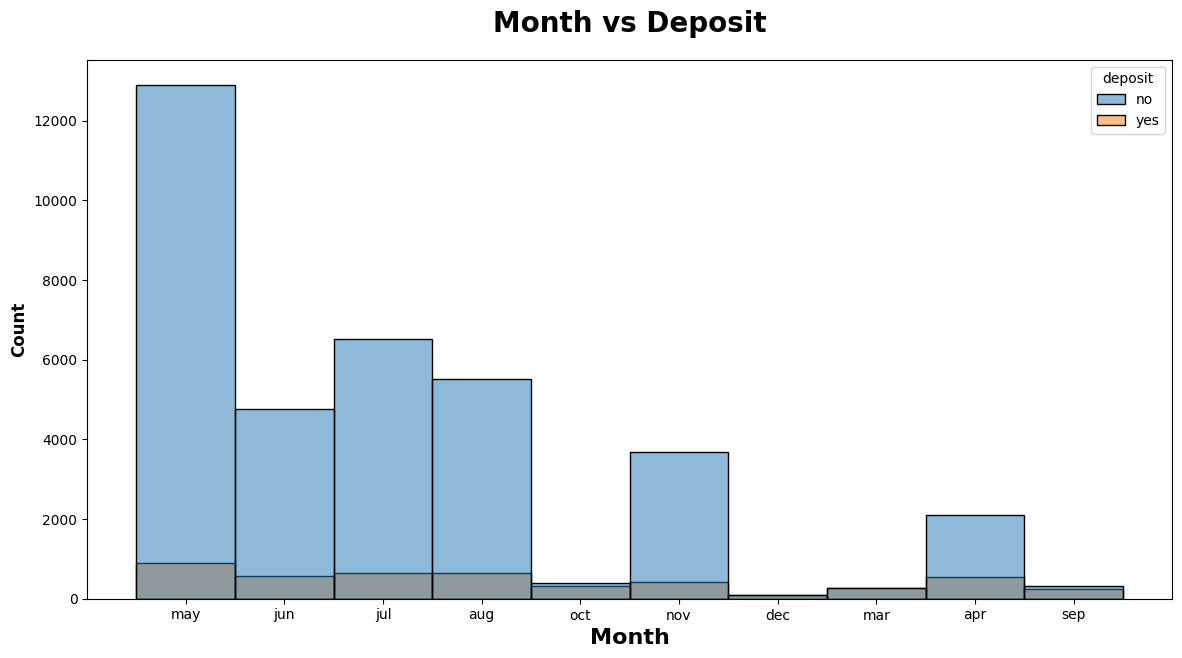

In [56]:
plt.subplots(figsize=(14,7))
sns.histplot(x="month",hue="deposit", data=df, kde=False)
plt.title("Month vs Deposit", weight="bold",fontsize=20, pad=20)
plt.xlabel("Month", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

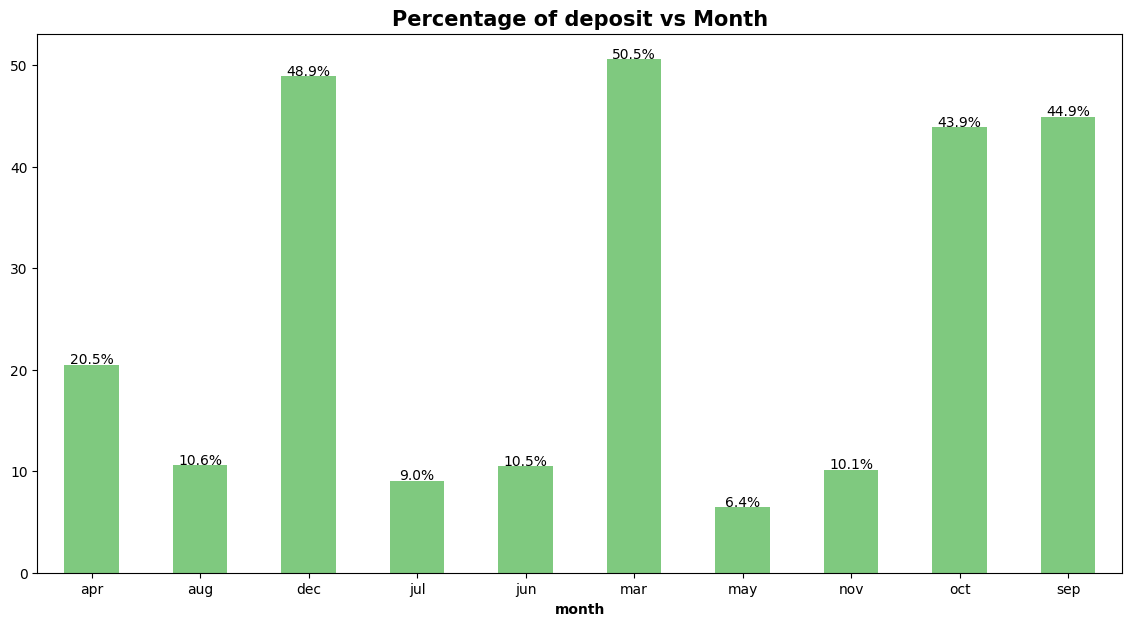

In [75]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['yes'])]['month'].value_counts()/df2['month'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of deposit vs Month" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['yes'])]['month'].value_counts()/df2['month'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('month' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

**Report** 
* As per chart all the month having march , dec, september, oct has highets number of deposit subscription. 

#### 4.8.1 Day of week has impact on deposit subscription?

In [70]:
#group data by day and count the deposit
df.groupby('day_of_week')['deposit'].value_counts(normalize=True)

day_of_week  deposit
fri          no         0.891913
             yes        0.108087
mon          no         0.900517
             yes        0.099483
thu          no         0.878812
             yes        0.121188
tue          no         0.882200
             yes        0.117800
wed          no         0.883329
             yes        0.116671
Name: proportion, dtype: float64

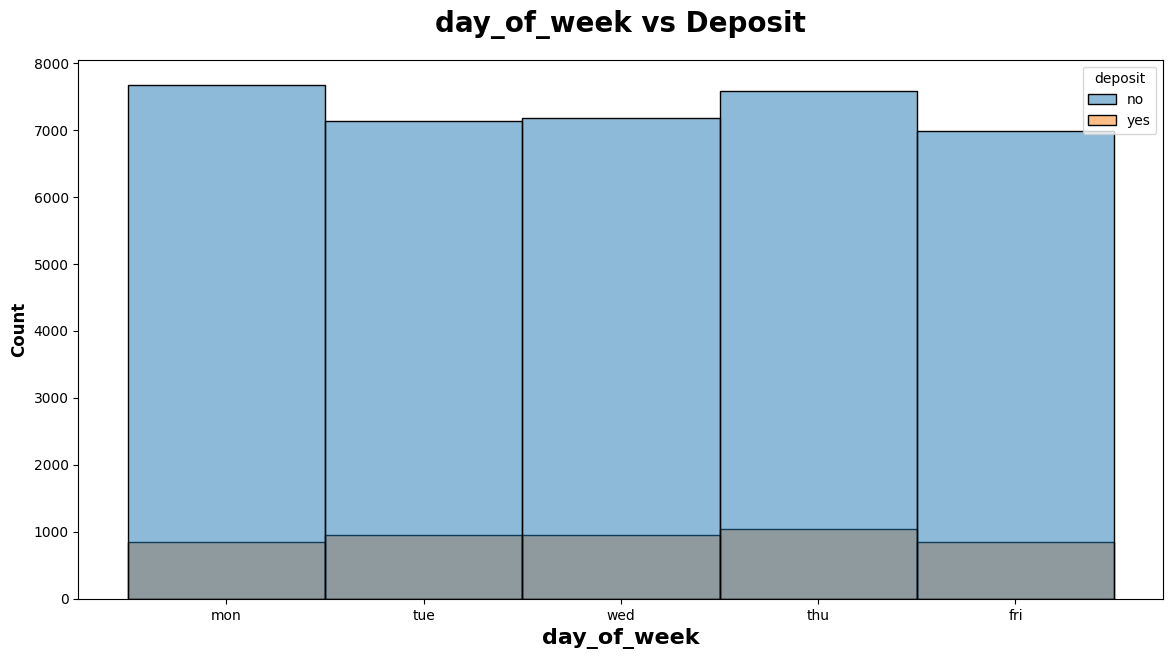

In [71]:
plt.subplots(figsize=(14,7))
sns.histplot(x="day_of_week",hue="deposit", data=df, kde=False)
plt.title("day_of_week vs Deposit", weight="bold",fontsize=20, pad=20)
plt.xlabel("day_of_week", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

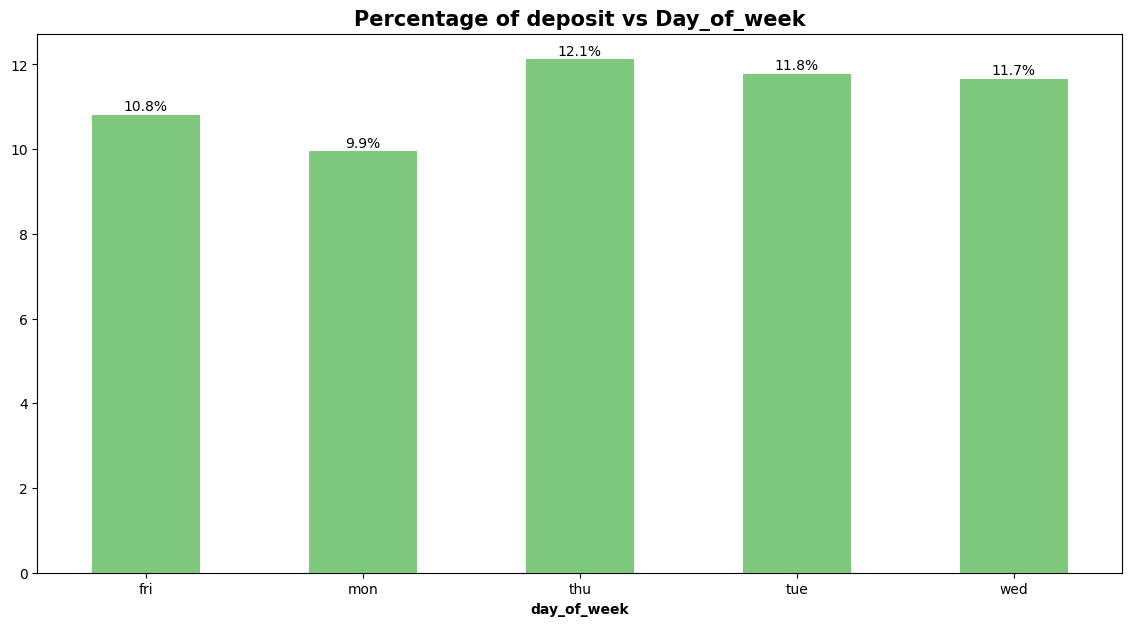

In [77]:
plt.figure(figsize=[14,7])

(100*df2[df2["deposit"].isin(['yes'])]['day_of_week'].value_counts()/df2['day_of_week'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of deposit vs Day_of_week" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["deposit"].isin(['yes'])]['day_of_week'].value_counts()/df2['day_of_week'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('day_of_week' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

###Report:

Day of week has no significant distribution so we can drop it.

In [82]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### 4.8.2 Prevailing wage based on Job experience

In [41]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


**Report**
* Suprisingly people who has less job experience has more prevailing wage.
* No job experience applicant has median prevailing wage as 72k USD.
* Previous job experience applicant has median prevailing wage as 69K USD.

#### 4.8.3 Prevailing wage based on Continent

In [42]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


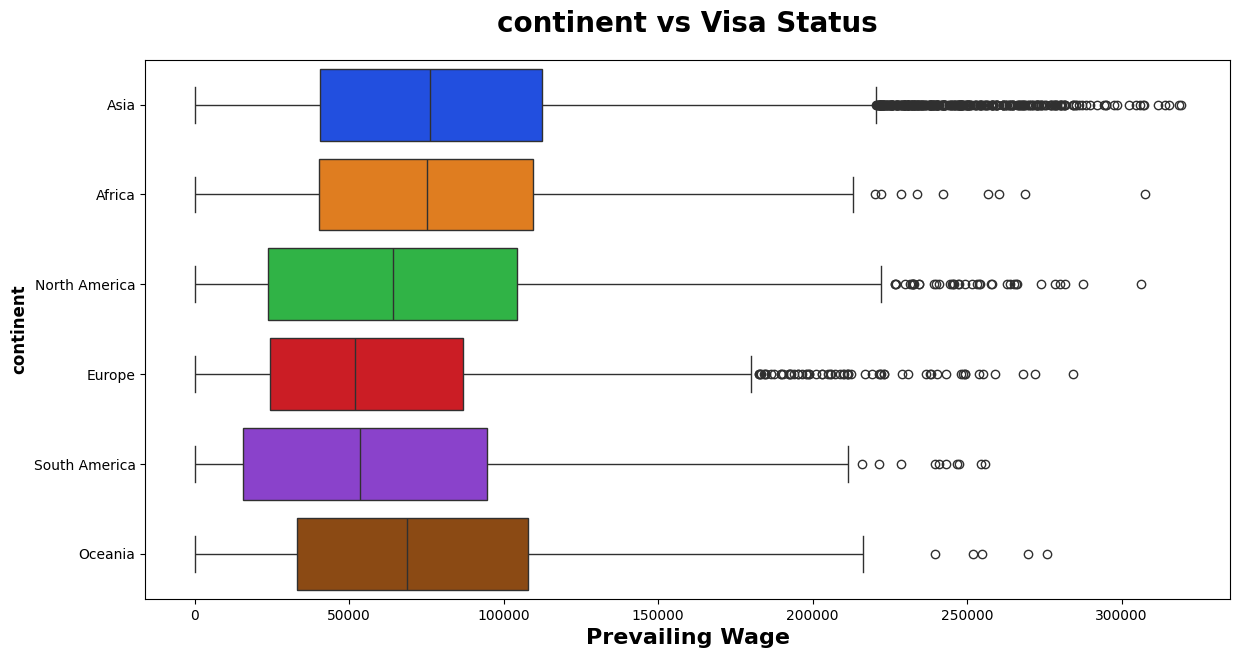

In [43]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

**Report**
* Average salary of people from Asia is higher than other continents.

### 4.9 Year of Establishment 

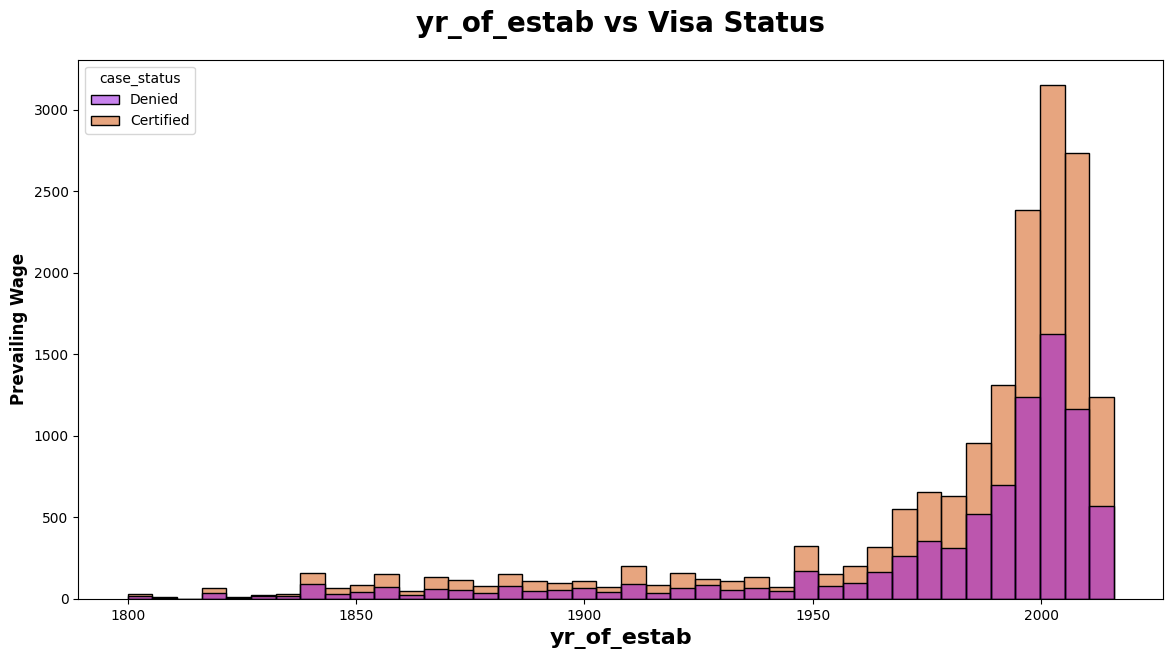

In [44]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

**Report**
* Each bins consists of 5 years.
* Many companies were established after year 2000.
* The most company establishment happened in year 2000-2005.

### Final Report 
* `case_id` column can be dropped as it is an ID.
* `requires_job_training` column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.
* `no_of_employees`, `prevailing_wage` columns have outllier which should be handled.
* `continent` columns has few unique values with very less count, which can be made as **others**
* Target column `case_status` is imbalanced can be handled before model building.

In [45]:
########################-------------Feature Engineering and Model Training in Next ipynb------------###########################